# Finding optimal hyper parameters for a CNN model

The point of this notebook is to obtain an optimal set of parameters for our CNN model to process time based series data. Specifically, we are processing IoT data from TON a well-kept dataset from The UNSW Group in Canberra, Australia.

The specific dataset being discussed here is the IoT GPS Tracker dataset.



We have pip install mealpy each time because it is not a default python package ,and every time the runtime refreshes; the package is uninstalled.

In [ ]:
%pip install mealpy==3.0.1
%pip install -U scikit-learn
%pip install imbalanced-learn
%pip install matplotlib
%pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 44.9 MB/s eta 0:00:00


Our main libraries used are:

*   Imblearn
*   Pandas
*   Matplot Lib
*   MealPy
*   Numpy
*   SKLearn
*   Tensorflow
*   Time


In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek
import numpy
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from mealpy import FloatVar, FOX
import time

# Preparing the Datasets for the CNN Model

We split off the information that indicates whether or not an attack has occured (*label*) and the types of attacks (*type*).
Now there are three dataframes:
  X - all features
  y - attack or not
  y_type - type of attack

We split again into test and train data sets and include some randomness.
**Reset_index** drops the indexes from these new dataframes.
Next, we encode the text data, add another randomness, and scale all dataframes. The X dataframe is reshaped.

In [ ]:
#Uncomment for local use
#raw_data = pandas.read_csv('../../Train_Test_IoT_dataset/Train_Test_IoT_GPS_Tracker.csv')
#Uncomment for Google Colab
raw_data = pandas.read_csv('Train_Test_IoT_GPS_Tracker.csv')
X = raw_data.drop(columns=['label','type'])
y = raw_data['label']
y_type = raw_data['type']

In [ ]:
# Binary
X_train, X_testsplit, y_train, y_testsplit = train_test_split(X, y, test_size=0.2, random_state=777)
# Binary validation
X_test, X_validation, y_test, y_validation = train_test_split(X_testsplit, y_testsplit, test_size=0.5, random_state=777)

#drop index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_validation = X_validation.reset_index(drop=True)
y_validation = y_validation.reset_index(drop=True)

In [ ]:
encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
X_train_encode = encoder.fit_transform(X_train)
X_test_encode = encoder.fit_transform(X_test)
y_train_encode = label_encoder.fit_transform(y_train)
y_test_encode = label_encoder.fit_transform(y_test)
X_validation_encode = encoder.fit_transform(X_validation)
y_validation_encode = label_encoder.fit_transform(y_validation)

In [ ]:
smotetomek = SMOTETomek(random_state=777)
X_rebalance, y_rebalance = smotetomek.fit_resample(X_train_encode, y_train_encode)

In [ ]:
scaler = StandardScaler()
X_rebalance = scaler.fit_transform(X_rebalance)
X_test_encode = scaler.transform(X_test_encode)

X_validation_encode = scaler.transform(X_validation_encode)

In [ ]:
X_rebalance = X_rebalance.reshape(X_rebalance.shape[0], X_rebalance.shape[1], 1)
X_test_encode = X_test_encode.reshape(X_test_encode.shape[0], X_test_encode.shape[1], 1)

X_validation_encode = X_validation_encode.reshape(X_validation_encode.shape[0], X_validation_encode.shape[1], 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 50)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 50)          │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,633 (248.57 KB)

 Trainable params: 63,533 (248.18 KB)

 Non-trainable params: 100 (400.00 B)

Epoch 1/70
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5012 - loss: 0.6939 - val_accuracy: 0.9045 - val_loss: 0.6924
Epoch 2/70
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5056 - loss: 0.6932 - val_accuracy: 0.3904 - val_loss: 0.6931
Epoch 3/70
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5062 - loss: 0.6928 - val_accuracy: 0.3904 - val_loss: 0.6934
Epoch 4/70
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5244 - loss: 0.6913 - val_accuracy: 0.3904 - val_loss: 0.6939
Epoch 5/70
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5378 - loss: 0.6905 - val_accuracy: 0.3904 - val_loss: 0.6940
Epoch 6/70
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5442 - loss: 0.6898 - val_accuracy: 0.3904 - val_loss: 0.6944
Epoch 7/70
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5460 - loss: 0.6893 - val_accuracy: 0.3904 - val_loss: 0.6942
Epoch 8/70
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5608 - loss: 0.6881 - val_accuracy: 0

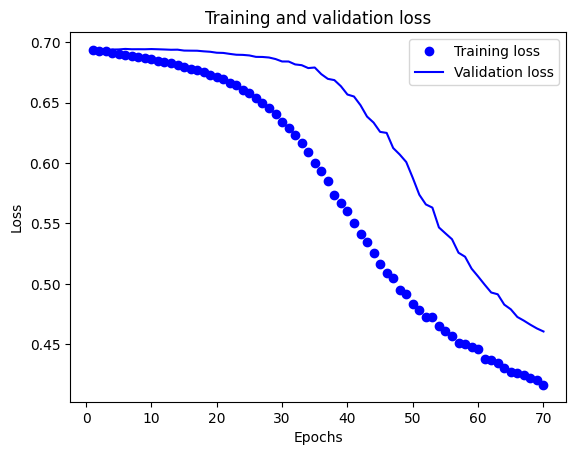

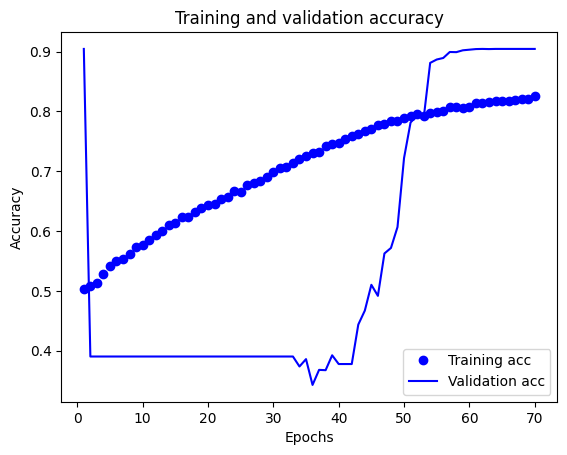


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.73      0.85      1527
           1       0.85      1.00      0.92      2369

    accuracy                           0.90      3896
   macro avg       0.93      0.87      0.88      3896
weighted avg       0.91      0.90      0.89      3896


Confusion Matrix
[[1120  407]
 [   0 2369]]


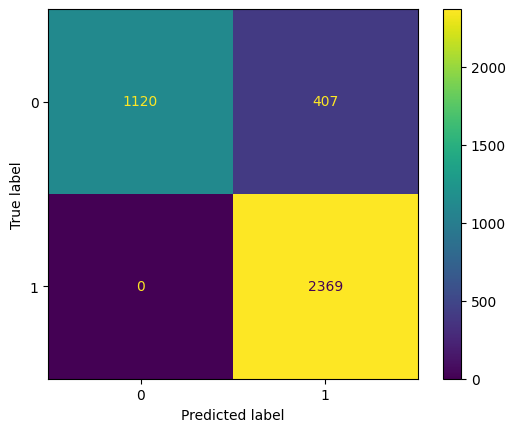

Time taken: 317.7899 seconds


In [ ]:
start_time_1 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=50, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(512, activation='relu'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.001)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=64, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time1 = time.perf_counter()
print(f"Time taken: {end_time1 - start_time_1:0.4f} seconds")

# Optimizing the model
Instead of looking at random number ranges for learning rates, filters, and hidden units, we have encoded specific values.

The hyper parameters we are attempting to optimize are:

*   Batch Size
*   Activation Functions
*   Learning Rates
*   Filters
*   Hidden Units


The base CNN model we made is ingested into *objective_function*.
  This is where our hyper parameters are being considered.
  It returns the Accuracy of that particular iteration.
**LB** and **UB** is set according to the list given above.



In [ ]:
BATCH_ENCODER = LabelEncoder()
BATCH_ENCODER.fit([32, 64, 128])

#act encoder --> Which activation function should be used?
ACT_ENCODER = LabelEncoder()
ACT_ENCODER.fit(['softmax', 'softplus', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'])

#Learning Rate encoder
LR_ENCODER = LabelEncoder()
LR_ENCODER.fit([0.0005, 0.001, 0.005, 0.01, 0.05, 0.1])

#Filter encoder
FILTER_ENCODER = LabelEncoder()
FILTER_ENCODER.fit([25, 50, 75])

#Hidden Units encoder
HIDDEN_ENCODER = LabelEncoder()
HIDDEN_ENCODER.fit([400, 512, 640])

def objective_function(params):
  '''RULES:
      Batch Size - 32, 64, 128
      Activation - softmax, softplus, relu, tanh, sigmoid, hard_sigmoid, linear
      Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1
      Filters - 25, 50, 75
      Hidden Units - 400, 512, 640
      Dense Layers - 5, 8, 10
  '''
  batch_size = BATCH_ENCODER.inverse_transform([int(params[0])])[0]
  activation = ACT_ENCODER.inverse_transform([int(params[1])])[0]
  learning_rate = LR_ENCODER.inverse_transform([int(params[2])])[0]
  filter = FILTER_ENCODER.inverse_transform([int(params[3])])[0]
  hidden_units = HIDDEN_ENCODER.inverse_transform([int(params[4])])[0]

  model = tensorflow.keras.Sequential()
  model.add(tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1], X_rebalance.shape[2]))),
  model.add(tensorflow.keras.layers.Conv1D(filters=filter, kernel_size=3, activation='sigmoid')),
  model.add(tensorflow.keras.layers.MaxPooling1D(pool_size=2)),
  model.add(tensorflow.keras.layers.Dropout(0.3)),
  model.add(tensorflow.keras.layers.BatchNormalization()),
  model.add(tensorflow.keras.layers.LSTM(64)),
  model.add(tensorflow.keras.layers.Flatten()),
  model.add(tensorflow.keras.layers.Dense(int(hidden_units), activation=activation)),
  model.add(tensorflow.keras.layers.Dropout(0.5)),
  model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))


  optimizer = tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(X_rebalance, y_rebalance, batch_size=batch_size, epochs=15, validation_data=(X_validation_encode, y_validation_encode), verbose=0)
  min_validation_accuracy = 1-history.history['val_accuracy'][-1]
  print(f"Accuracy {min_validation_accuracy}")
  return min_validation_accuracy

LB = [0, 0, 0, 0, 0]
UB = [2.99, 6.99, 5.99, 2.99, 2.99]

problem_dict = {
    "obj_func": objective_function,
    "bounds": FloatVar(lb=LB, ub=UB),
    "minmax": "min",
    "verbose": True
}

model = FOX.OriginalFOX(epoch=15, pop_size=20)
g_best = model.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")
model.history.save_global_objectives_chart(filename="hello/goc")
model.history.save_local_objectives_chart(filename="hello/loc")

model.history.save_global_best_fitness_chart(filename="hello/gbfc")
model.history.save_local_best_fitness_chart(filename="hello/lbfc")

model.history.save_runtime_chart(filename="hello/rtc")

model.history.save_exploration_exploitation_chart(filename="hello/eec")

model.history.save_diversity_chart(filename="hello/dc")


INFO:mealpy.swarm_based.FOX.OriginalFOX:Solving single objective optimization problem.


Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.2027720808982849
Accuracy 0.39040040969848633
Accuracy 0.40092402696609497
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.29491788148880005
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.29491788148880005
Accuracy 0.29491788148880005
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137

INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 1, Current best: 0.09548252820968628, Global best: 0.09548252820968628, Runtime: 1867.05125 seconds


Accuracy 0.35805952548980713
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.36858314275741577
Accuracy 0.37243324518203735
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.31519508361816406
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.39964067935943604
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 2, Current best: 0.09548252820968628, Global best: 0.09548252820968628, Runtime: 1280.63131 seconds


Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.2992812991142273
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.1573408842086792
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 3, Current best: 0.09548252820968628, Global best: 0.09548252820968628, Runtime: 1654.29894 seconds


Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.09573924541473389
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 4, Current best: 0.09548252820968628, Global best: 0.09548252820968628, Runtime: 1613.82989 seconds


Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.10189938545227051
Accuracy 0.39040040969848633
Accuracy 0.15862423181533813
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.30775153636932373
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 5, Current best: 0.09548252820968628, Global best: 0.09548252820968628, Runtime: 1808.11948 seconds


Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.18506157398223877
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.13039016723632812
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 6, Current best: 0.09548252820968628, Global best: 0.09548252820968628, Runtime: 1696.23605 seconds


Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.10574948787689209
Accuracy 0.49948662519454956
Accuracy 0.29491788148880005
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.09933263063430786
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 7, Current best: 0.09548252820968628, Global best: 0.09548252820968628, Runtime: 1540.78600 seconds


Accuracy 0.29491788148880005
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 8, Current best: 0.09548252820968628, Global best: 0.09548252820968628, Runtime: 2182.49897 seconds


Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.23639631271362305
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.14168375730514526
Accuracy 0.39040040969848633
Accuracy 0.12628334760665894
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 9, Current best: 0.09548252820968628, Global best: 0.09548252820968628, Runtime: 1457.47780 seconds


Accuracy 0.3883470296859741
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.1432238221168518
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.3883470296859741
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 10, Current best: 0.09548252820968628, Global best: 0.09548252820968628, Runtime: 1997.12796 seconds


Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.29491788148880005
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.1765913963317871
Accuracy 0.09548252820968628
Accuracy 0.0998460054397583
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 11, Current best: 0.09548252820968628, Global best: 0.09548252820968628, Runtime: 1504.91307 seconds


Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.17094457149505615
Accuracy 0.10241276025772095
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.29491788148880005
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 12, Current best: 0.09548252820968628, Global best: 0.09548252820968628, Runtime: 1688.72794 seconds


Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.175564706325531
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.11524641513824463
Accuracy 0.6095995903015137
Accuracy 0.09933263063430786
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 13, Current best: 0.09548252820968628, Global best: 0.09548252820968628, Runtime: 1712.06991 seconds


Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.09548252820968628
Accuracy 0.29491788148880005
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.387320339679718
Accuracy 0.09548252820968628
Accuracy 0.10112935304641724
Accuracy 0.31699180603027344
Accuracy 0.39040040969848633
Accuracy 0.39040040969848633


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 14, Current best: 0.09548252820968628, Global best: 0.09548252820968628, Runtime: 1250.35597 seconds


Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.14579057693481445
Accuracy 0.09548252820968628
Accuracy 0.39040040969848633
Accuracy 0.6095995903015137
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.308521568775177
Accuracy 0.6095995903015137
Accuracy 0.39040040969848633
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137
Accuracy 0.09548252820968628
Accuracy 0.6095995903015137


INFO:mealpy.swarm_based.FOX.OriginalFOX:>>>Problem: P, Epoch: 15, Current best: 0.09548252820968628, Global best: 0.09548252820968628, Runtime: 1909.08025 seconds


Accuracy 0.39040040969848633
Solution: [2.45535865 2.37747655 3.68406987 2.44430101 2.87378903], Fitness: 0.09548252820968628
Solution: [2.45535865 2.37747655 3.68406987 2.44430101 2.87378903], Fitness: 0.09548252820968628


Solution: [2.45535865 2.37747655 3.68406987 2.44430101 2.87378903], Fitness: 0.09548252820968628

Batch Size - 32, 64, **128**

Activation - softmax, softplus, **relu**, tanh, sigmoid, hard_sigmoid, linear

Learning Rate - 0.0005, 0.001, 0.005, **0.01**, 0.05, 0.1

Filters - 25, 50, **75**

Hidden Units - 400, 512, **640**

Model: "sequential_322"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_322 (Conv1D)             │ (None, 2, 75)          │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_322               │ (None, 1, 75)          │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_644 (Dropout)           │ (None, 1, 75)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_322         │ (None, 1, 75)          │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_322 (LSTM)                 │ (None, 64)             │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_322 (Flatten)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_644 (Dense)               │ (None, 640)            │        41,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_645 (Dropout)           │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_645 (Dense)               │ (None, 1)              │           641 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,681 (307.35 KB)

 Trainable params: 78,531 (306.76 KB)

 Non-trainable params: 150 (600.00 B)

Epoch 1/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5057 - loss: 0.6933 - val_accuracy: 0.3904 - val_loss: 0.6937
Epoch 2/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5238 - loss: 0.6917 - val_accuracy: 0.3904 - val_loss: 0.6928
Epoch 3/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5485 - loss: 0.6892 - val_accuracy: 0.3904 - val_loss: 0.6921
Epoch 4/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5687 - loss: 0.6869 - val_accuracy: 0.3904 - val_loss: 0.6909
Epoch 5/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5827 - loss: 0.6837 - val_accuracy: 0.3429 - val_loss: 0.6889
Epoch 6/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6126 - loss: 0.6784 - val_accuracy: 0.3557 - val_loss: 0.6871
Epoch 7/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6306 - loss: 0.6712 - val_accuracy: 0.3429 - val_loss: 0.6834
Epoch 8/70
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6628 - loss: 0.6576 - val_accuracy: 0.

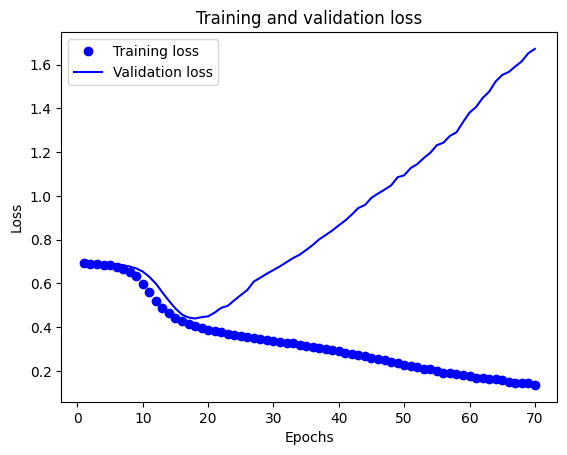

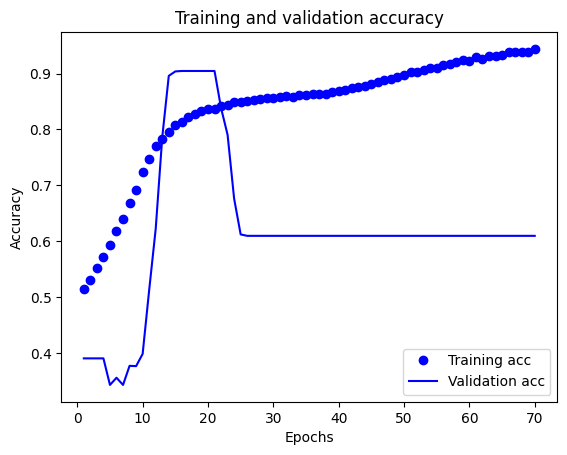


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1527
           1       0.61      1.00      0.76      2369

    accuracy                           0.61      3896
   macro avg       0.30      0.50      0.38      3896
weighted avg       0.37      0.61      0.46      3896


Confusion Matrix
[[   0 1527]
 [   0 2369]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


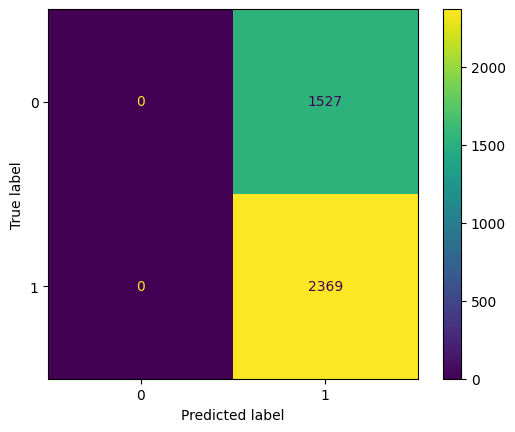

Time taken: 164.3222 seconds


In [ ]:
start_time_2 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=75, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(640, activation='relu'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.01)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=128, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time2 = time.perf_counter()
print(f"Time taken: {end_time2 - start_time_2:0.4f} seconds")